In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('shop data.csv')
df.head()

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes


In [4]:
#x=df.iloc[:,:-1]
#x=df[['age','income','gender','m_status']]
x=df.drop('buys',axis=1)
x.head()

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single


In [5]:
y=df[['buys']]
y.head()

,buys
0,no
1,no
2,yes
3,yes
4,yes


# Preprocessing

In [6]:
x.head()

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single


In [7]:
from  sklearn.preprocessing import LabelEncoder

In [8]:
le=  LabelEncoder()

In [9]:
x=x.apply(le.fit_transform)
x.head()

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1


In [62]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=.25, random_state=1)

In [63]:
xtrain.head()

,age,income,gender,m_status
10,1,2,0,1
4,2,1,0,1
2,0,0,1,1
17,1,0,0,1
6,0,1,0,0


In [64]:
xtest

,age,income,gender,m_status
19,0,0,1,1
16,2,2,1,0
3,2,2,1,1
13,2,2,1,0
18,0,2,0,0
15,1,0,0,0


In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dect=DecisionTreeClassifier()

In [67]:
dect.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [68]:
dect.score(xtest,ytest)

0.6666666666666666

# Performing Using Cross Validation Score

In [69]:
from sklearn.model_selection import cross_val_score 

In [77]:
result=cross_val_score(DecisionTreeClassifier(),x,y,cv=3)
result

array([0.875     , 0.57142857, 0.57142857])

In [78]:
result.mean()   # This model performing not good

0.6726190476190476

In [83]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

[Text(0.3333333333333333, 0.9, 'age <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4444444444444444, 0.7, 'gender <= 0.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.2222222222222222, 0.5, 'age <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.3, 'm_status <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.5, 'income <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.3, 'income <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(

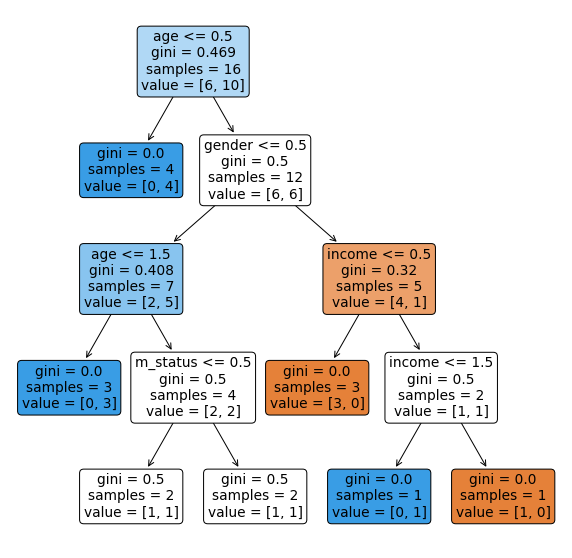

In [85]:
plt.figure(figsize=(10,10))
tree.plot_tree(dect,filled=True,rounded=True,feature_names=x.columns.tolist())